In [21]:
from IPython.display import YouTubeVideo
import cv2
import numpy as np
import os
import math
from matplotlib import pyplot as plt
from IPython.display import clear_output # Extra

%matplotlib inline
# Open a new thread to manage the external cv2 interaction
cv2.startWindowThread()

def plt_show(image, title=""):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.axis("off")
    plt.title(title)
    plt.imshow(image, cmap="Greys_r")
    plt.show()

<img style="float: right; margin-right: 200px" src="http://www.apulus.com/wp-content/uploads/2014/11/OpenCV-Logo.png">

<h1 style="align: center; color: ">Face Detection using Haar Featured-based Cascade Classifiers</h1>
<br>
- Paul Viola and Michale Jones "Rapid Object Detection using a Boosted Cascade of Simple Features" (2001)
- Haar Features
- Integral Image
- Adaboost
- Cascading

### Haar Features
<div style="float: left; width: 50%; height: 300px">
<br>
<ul>
 <li> Edge features
 <li>Line features
 <br/>
 <li>Center surround features
</ul>
</div>
<div style="float: right; width: 50%; height: 300px">
<img src="http://fileadmin.cs.lth.se/graphics/theses/projects/facerecognition/1_all_haar_wavelets.png">
</div>
<br>
<img style="margin: 0 auto; width: 60%" src="http://answers.opencv.org/upfiles/14253135944291716.png">
<br>
$$Output =  \sum{P_{White}} - \sum{P_{Black}} \\$$
Output is high when regions are similar.


Problems: 
1. Even a 24x24 window results over 160,000 features.
2. Every time you apply one of these 160,000 you need to sum all pixel intensities.

Solutions:
1. Adaboost
2. Integral Image

### Integral Image
<div style="float: right; width: 40%">
<img src="http://www.nongnu.org/rapp/doc/rapp/integral.png">
</div>
S = $\sum{C}+\sum{A}-\sum{B}-\sum{D}$<br>

Idea:<br>
Prior to applying features, convert each pixel intensity by the sum of all pixel intensities to the left and above it.
<img style="margin-left: 150px" src="images/integral_image.png">

<font style="color: #be2830">Reduce to 4 numbers!</font>

### Adaboost
$$ F(x)=\alpha_1f_1(x)+\alpha_2f_2(x)+\alpha_3f_3(x)+\dots \\$$
- Weak classifiers: $f_n(x) $
- Strong classifier: $F(x) $
- The bigger the weight $\alpha$ the more relevant the featured is.

Total amount of features: 160000+ <br>
<font style="color: #be2830">After Adaboost: 6000 features! </font>

Problem
- Still 6000 features are too many
- They need to sweep the hole image in all differen sizes.

Solution
- Cascading

### Cascading
<div style="float: right; width: 50%">
<img style= "width: 80%" src="http://www.bogotobogo.com/python/OpenCV_Python/images/FaceDetection/stages.png">
</div>
- Separate features in different classifiers
- Discard if really sure
- 38 stages with 1, 10, 25, 25 and 50 features in first 5 stages

### Can be applied for any type of object

OpenCV comes with a trainer as well as detector. If you want to train your own classifier for any object like car, planes etc. you can use OpenCV to create one.

<div style="width: 33%; float: left; height: 250px">
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSOofIjL3un1IgzTmuF-0C4kryjYeFxLUtV1mXrhDBXQhdgcJhp">
</div>
<div style="width: 33%; float: right; height: 250px">
    <img src="https://encrypted-tbn2.gstatic.com/images?q=tbn:ANd9GcS4w56wb3RmNacBmu815ORfX2cLYgtrFsutW2_k0nHNrmcjo8_Y">
</div>
<div style="width: 33%; margin: 0 auto; height: 250px">
    <img src="https://abhishek4273.files.wordpress.com/2014/03/output1.jpg">
</div>
<div style="width: 33%; float: left; height: 250px">
    <img src="http://answers.opencv.org/upfiles/13610841248853756.png">
</div>
<div style="width: 33%; float: right; height: 250px">
    <img src="https://encrypted-tbn1.gstatic.com/images?q=tbn:ANd9GcRV6hfNajOFN92rZVhxS7e_c9dcbKl-1psaCus4Gx71wtehWEYu">
</div>
<div style="width: 33%; margin: 0 auto; height: 250px">
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSY2QX_FSmiqiS_5akHP2RjXM9Dy3D7ocEdsyW0H27XGrkWvx0y">
</div>

List of available pretraied models in OpenCV:

<div style="float: left; width: 50%">
<ul>
    <li> haarcascade_eye_tree_eyeglasses  
    <li> haarcascade_mcs_leftear
    <li> haarcascade_eye                  
    <li> haarcascade_mcs_lefteye
    <li> haarcascade_frontalface_alt2   
    <li> haarcascade_mcs_mouth
    <li> haarcascade_frontalface_alt_tree
    <li> haarcascade_mcs_nose
    <li> <font style="color: #be2830">haarcascade_frontalface_alt</font>       
    <li> haarcascade_mcs_rightear
    <li> haarcascade_frontalface_default
</ul>
</div>
<div style="float: right; width: 50%">
<ul>
    <li> haarcascade_mcs_righteye
    <li> haarcascade_fullbody            
    <li> haarcascade_mcs_upperbody
    <li> haarcascade_lefteye_2splits    
    <li> haarcascade_profileface
    <li> haarcascade_lowerbody            
    <li> haarcascade_righteye_2splits
    <li> haarcascade_mcs_eyepair_big     
    <li> haarcascade_smile
    <li> haarcascade_mcs_eyepair_small
    <li> haarcascade_upperbody
</ul>
</div>

<h2 align="center" style='color: #be2830'>Detecting Faces with OpenCV</h2>

``` python
detector = cv2.CascadeClassifier( xml_file_path)

face_coord = detector.detectMultiScale(image, scale_factor, min_neighbors, min_size, flags)
```
face_coord: Numpy array with rows equal to [x, y, width, height]

### Capture and display picture

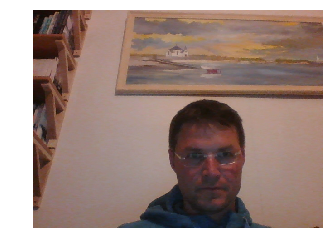

In [22]:
webcam = cv2.VideoCapture(0)
_, frame = webcam.read()
webcam.release()
plt_show(frame)  

### Try to detect the face. What is the returned object?

In [23]:
detector = cv2.CascadeClassifier("xml/frontal_face.xml")

scale_factor = 1.2
min_neighbors = 5
min_size = (30, 30)
biggest_only = True
flags = cv2.CASCADE_FIND_BIGGEST_OBJECT | \
            cv2.CASCADE_DO_ROUGH_SEARCH if biggest_only else \
            cv2.CASCADE_SCALE_IMAGE
        
faces_coord = detector.detectMultiScale(frame,
                                        scaleFactor=scale_factor,
                                        minNeighbors=min_neighbors,
                                        minSize=min_size,
                                        flags=flags)
print "Type: " + str(type(faces_coord))
print faces_coord
print "Length: " + str(len(faces_coord)) 

Type: <type 'numpy.ndarray'>
[[303 251 183 183]]
Length: 1


### Draw a rectangle around the face

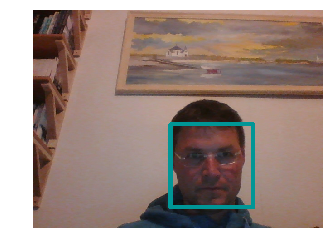

In [24]:
for (x, y, w, h) in faces_coord:
    cv2.rectangle(frame, (x, y), (x + w, y + h), (150, 150, 0), 8)
plt_show(frame) 

### Helpful classes definitions

In [25]:
class FaceDetector(object):
    def __init__(self, xml_path):
        self.classifier = cv2.CascadeClassifier(xml_path)
    
    def detect(self, image, biggest_only=True):
        scale_factor = 1.2
        min_neighbors = 5
        min_size = (30, 30)
        biggest_only = True
        flags = cv2.CASCADE_FIND_BIGGEST_OBJECT | \
                    cv2.CASCADE_DO_ROUGH_SEARCH if biggest_only else \
                    cv2.CASCADE_SCALE_IMAGE
        faces_coord = self.classifier.detectMultiScale(image,
                                                       scaleFactor=scale_factor,
                                                       minNeighbors=min_neighbors,
                                                       minSize=min_size,
                                                       flags=flags)
        return faces_coord

### Helpful classes definitions

In [26]:
class VideoCamera(object):
    def __init__(self, index=0):
        self.video = cv2.VideoCapture(index)
        self.index = index
        print self.video.isOpened()

    def __del__(self):
        self.video.release()
    
    def get_frame(self, in_grayscale=False):
        _, frame = self.video.read()
        if in_grayscale:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        return frame

### Detect Face in a Live Video

In [27]:
webcam = VideoCamera()
detector = FaceDetector("xml/frontal_face.xml")

True


In [28]:
try:
    while True:
        frame = webcam.get_frame()
        faces_coord = detector.detect(frame)
        for (x, y, w, h) in faces_coord:
            cv2.rectangle(frame, (x, y), (x + w, y + h), 
                          (150, 150, 0), 8)
        plt_show(frame) 
        clear_output(wait = True)
except KeyboardInterrupt:
     print "Live Video Interrupted"

Live Video Interrupted


Congrats, you have learned how to detect faces.

<h2 align="center" style='color: #be2830'>Image Normalization</h2>

<div style="float: right; width: 30%; margin-right: 100px">
    <img style="width: 50%" src="https://encrypted-tbn3.gstatic.com/images?q=tbn:ANd9GcQYNNV8kaI_AeCTzO1yZFGLcHJlUU8eiQX78Fa-S39jtC0FyU56">
    <img src="http://docs.opencv.org/3.1.0/equalization_opencv.jpg">
</div>

- Cut the Face
- Normallize Pixel Intensity
- Resize Face Image
- Align Face Image? 

Before feeding the faces to train the model and before trying to recognize.

<h2 align="center" style='color: #be2830'>State of the Art - Facebook DeepFace</h2>

<img style="float:right; width: 50%" src="images/facebook_norm.png">
<br>
<p>"DeepFace: Closing the Gap to Human-Level Performance in Face Verification"</p>
<a href="http://www.cv-foundation.org/openaccess/content_cvpr_2014/papers/Taigman_DeepFace_Closing_the_2014_CVPR_paper.pdf"><p> Y. Taigman et al., 2014.</p></a>


### Cut the face
<img style="width: 40%; float: right; margin-right: 100px" src="images/cut_face.png">
Only the 70% of the width.
```python
w_rm = int(0.2 * w / 2)
```

In [29]:
def cut_faces(image, faces_coord):
    faces = []
      
    for (x, y, w, h) in faces_coord:
        w_rm = int(0.2 * w / 2)
        faces.append(image[y: y + h, x + w_rm: x + w - w_rm])
         
    return faces

### Detect and cut the face

In [30]:
try:
    while True:
        frame = webcam.get_frame()
        faces_coord = detector.detect(frame)
        if len(faces_coord):
            faces = cut_faces(frame, faces_coord)
            plt_show(faces[0])
            clear_output(wait = True)
except KeyboardInterrupt:
     print "Live Video Interrupted"

Live Video Interrupted


### Normalize Pixel Intensity

<img style="width: 40%; float: right; margin-right: 100px" src="images/histogram.png">

- The complete grayscale spectrum is used [0-255].
- Contrast is enhanced.



In [31]:
def normalize_intensity(images):
    images_norm = []
    for image in images:
        is_color = len(image.shape) == 3 
        if is_color:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        images_norm.append(cv2.equalizeHist(image))
    return images_norm

### Equalize Histogram of last face recognized


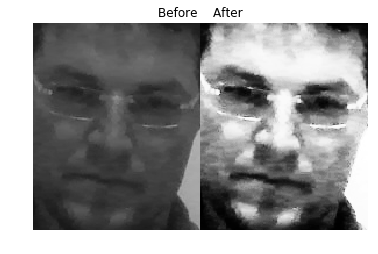

In [32]:
face_bw = cv2.cvtColor(faces[0], cv2.COLOR_BGR2GRAY)
face_bw_eq = cv2.equalizeHist(face_bw)
plt_show(np.hstack((face_bw, face_bw_eq)), "Before    After") 

### Histogram comparison 

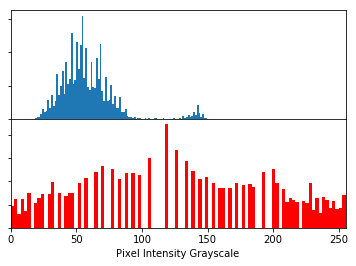

In [33]:
f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=False)
ax1.hist(face_bw.flatten(),100)
ax2.hist(face_bw_eq.flatten(),100, color = 'r')
ax1.set_xlim([0,255])
# ax1.set_ylim([0,1000])
ax2.set_xlim([0, 255])
# ax2.set_ylim([0, 700])
ax1.set_yticklabels([])
ax2.set_yticklabels([])
ax2.set_xlabel('Pixel Intensity Grayscale')
f.subplots_adjust(hspace=0) 
plt.show()

### Detect, cut and normalize face image

In [34]:
try:
    while True:
        frame = webcam.get_frame()
        faces_coord = detector.detect(frame)
        if len(faces_coord): 
            faces = cut_faces(frame, faces_coord)
            faces = normalize_intensity(faces)
            plt_show(faces[0])
            clear_output(wait = True)
except KeyboardInterrupt:
     print "Live Video Interrupted"

Live Video Interrupted


### Resize

In [35]:
def resize(images, size=(50, 50)):
    images_norm = []
    for image in images:
        if image.shape < size:
            image_norm = cv2.resize(image, size, 
                                    interpolation = cv2.INTER_AREA)
        else:
            image_norm = cv2.resize(image, size, 
                                    interpolation = cv2.INTER_CUBIC)
        images_norm.append(image_norm)

    return images_norm 

### Detect, cut, normalize and resize face image

In [36]:
try:
    while True:
        frame = webcam.get_frame()
        faces_coord = detector.detect(frame)
        if len(faces_coord):
            faces = cut_faces(frame, faces_coord)
            faces = normalize_intensity(faces)
            faces = resize(faces)
            plt_show(faces[0])
            clear_output(wait = True)
except KeyboardInterrupt:
     print "Live Video Interrupted"

Live Video Interrupted


### Alignment

<p>Detect face landmarks and align face.</p>
Example: Use eye detector to rotate image.

<img style="height: 250px; float: left; margin-left:100px" src="http://opencv-python-tutroals.readthedocs.org/en/latest/_images/face.jpg">


<img style="height: 250px; float: right; margin-right:100px" src="http://blog.drndos.sk/wp-content/uploads/2014/05/11971025451307781503johnny_automatic_normal_face.svg_.hi_.png">

### Extra functions: Bringing all together

In [37]:
def normalize_faces(frame, faces_coord):
    faces = cut_faces(frame, faces_coord)
    faces = normalize_intensity(faces)
    faces = resize(faces)
    return faces

def draw_rectangle(image, coords):
    for (x, y, w, h) in coords:
        w_rm = int(0.2 * w / 2) 
        cv2.rectangle(image, (x + w_rm, y), (x + w - w_rm, y + h), 
                              (150, 150, 0), 8)

<h2 align="center" style='color: #be2830'>Build Our Dataset</h2>
<h4 align="center">
Detect $\rightarrow$ Cut $\rightarrow$ Normalize $\rightarrow$ Resize $\rightarrow$ Save</h4>


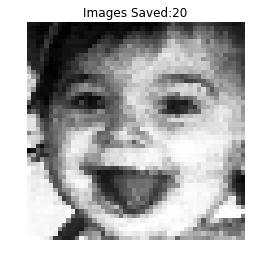

In [39]:
folder = "people/" + raw_input('Person: ').lower() # input name
cv2.namedWindow("PyData Tutorial", cv2.WINDOW_AUTOSIZE)
if not os.path.exists(folder):
    os.mkdir(folder)
    counter = 1
    timer = 0
    while counter < 21 : # take 20 pictures
        frame = webcam.get_frame()
        faces_coord = detector.detect(frame) # detect
        if len(faces_coord) and timer % 700 == 50: # every Second or so
            faces = normalize_faces(frame, faces_coord) # norm pipeline
            cv2.imwrite(folder + '/' + str(counter) + '.jpg', faces[0])
            plt_show(faces[0], "Images Saved:" + str(counter))
            clear_output(wait = True) # saved face in notebook
            counter += 1
        draw_rectangle(frame, faces_coord) # rectangle around face
        cv2.imshow("PyData Tutorial", frame) # live feed in external
        cv2.waitKey(50)
        timer += 50
    cv2.destroyAllWindows()
else:
    print "This name already exists."

In [40]:
del webcam

## NEXT
<ol> 
    <h2> <li> Manipulation of Images and Videos [DONE]</h2> 
    <h2> <li> Face Detection and Building the Dataset [DONE]</h2>
    <h2 style='color: #be2830'><a style='color: #be2830' href="http://localhost:8888/notebooks/03_Building_the_Recognition_Model.ipynb"> <li> Building the Recognition Model.</a></h2>
    <h2> <li> Recognize Faces in a Live VIdeo Feed</h2>
<ol>